<a href="https://colab.research.google.com/github/suleymanVR/MachineLearning/blob/main/Week10_DimensionalityReduction_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA1



In [168]:
from sklearn.datasets import load_iris
import pandas as pd

# %%
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data,columns = feature_names)
df["sinif"] = y

x = data

In [169]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [170]:
#%% PCA
from sklearn.decomposition import PCA #PCA ( Principal Component Analysis)(Temel Bileşenler Analizi)
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)

#Veri seti üzerinde yapmış olduğumuz PCA dönüşümü bize 2 bileşen seçmenin, verilerin toplam varyansının yaklaşık % 97.7'sini koruyabileceğimizi söylemektedir. 
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


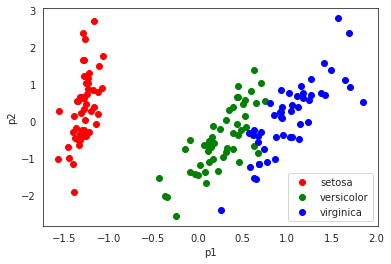

In [171]:
#%% 2D

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

# PCA2

In [172]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Birçok Jupyter defter kullanıcısı, defterin başında %matplotlib inline komutunu vermeyi tercih eder. 
#Bu sayede ürettiğiniz matplotlib grafikleri defterin içine gömülür ve tam bir belge oluşturmanızı sağlar.
#%matplotlib notebook kullanılarakda aynı işlem yapılabilir fakat bu komut ile grafik zoomlanabilir dinamik bir hal alır.
%matplotlib inline 

In [173]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [174]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [175]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Standardize the Data**


In [176]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**PCA Projection to 2D**

In [177]:
pca = PCA(n_components=2)

In [178]:
principalComponents = pca.fit_transform(x)

In [179]:
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [180]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [181]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [182]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


**Visualize 2D Projection**

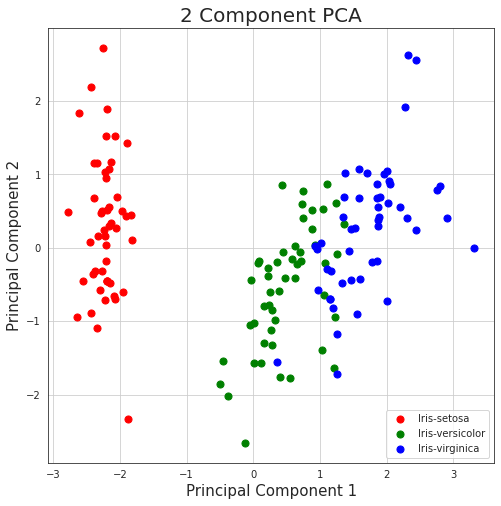

In [183]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Explained Variance**


In [184]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# PCA 3D

In [185]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Get the iris dataset
sns.set_style("white")
df = sns.load_dataset('iris')

In [187]:
# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

<Figure size 480x480 with 0 Axes>

<Figure size 480x480 with 0 Axes>

In [188]:
# Keep the 'species' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [189]:
# Run The PCA

# n_components : Tahmin edilen component sayısı
pca = PCA(n_components=3) 
pca.fit(df)

PCA(n_components=3)

In [190]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [191]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [192]:
# 3 boyut ile datanın %99.4'ünü temsil etmektedir.
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782])

In [193]:
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

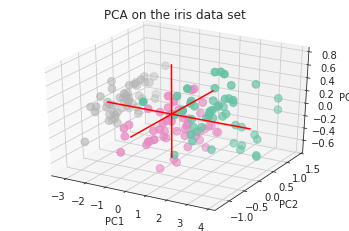

In [194]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()